# PREVALENCE OF MANDIBULAR FRACTURE IN A SELECTED REGION IN DELTA STATE, NIGERIA
The mandible is also referred to as the lower jaw and the temporomandibular joint (TMJ) connects the mandible to the skull. The distribution of mandibular fractures and the etiology is influenced by socio economic trends, geographic locations and social behaviour
Males show a great predominance in several studies on fractures carried out and this is due to combination of biological factors, differences in activities carried out and risk taking
### Content
The dataset used for model building contained 255 entries of 6 variables. The data contains the following information and their meaning:
#### •	RTA= Road Traffic Accident
#### •	S=Symphysis
#### •	P=Parasymphysis
#### •	B=Body
#### •	A=Angle
#### •	R=Ramus
#### •	M=Male
#### •	F=Female


### Objectives 

#### i. The prevalence of mandibular fractures seen at the selected location.
#### ii. The aetiology, pattern and anatomic distribution of madibular fractures.
#### iii. Gender variation in occurrence of mandibular fractures.
#### iv. The correlation between cause and occupation of the patient. 
#### v. The number of mandibular fractures in each 5-year period.
#### vi. The trends in mandibular fractures over a ten year period.
#### vii. The occurrence of madibular fractures in different occupations. 




In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_excel(r'C:\Users\osakue\Desktop\MARY\MARY DATA.xlsx')

In [4]:
df.head(2)

,DATE,GENDER,AGE,OCCUPATION,CAUSE,SITE,SEX,Unnamed: 7,Unnamed: 8
0,05/2014,F,7,STUDENT,SPORT,P,F,NaN,NaN
1,10/2011,M,9,STUDENT,RTA,B,M,NaN,NaN


In [5]:
df=df.drop(['Unnamed: 7', 'Unnamed: 8', 'GENDER'], axis = 1)

In [6]:
df.sample(5)

,DATE,AGE,OCCUPATION,CAUSE,SITE,SEX
91,05/2012,26,MOTORCYCLIST,RTA,B,F
242,12/2014,57,FARMER,FALL,B,M
180,12/2019,35,BUS,RTA,A,F
138,11/2020,29,MOTORCYCLIST,RTA,B,M
32,01/2014,20,STUDENT,ASSAULT,B,F


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DATE        255 non-null    object
 1   AGE         255 non-null    int64 
 2   OCCUPATION  255 non-null    object
 3   CAUSE       255 non-null    object
 4   SITE        255 non-null    object
 5   SEX         255 non-null    object
dtypes: int64(1), object(5)
memory usage: 12.1+ KB


In [8]:
df.shape

(255, 6)

# 

# Exploratory Analysis

### SEX DISTRIBUTION OF THE POPULATION

In [9]:
df3=pd.DataFrame(df['SEX'].value_counts()).reset_index()



In [10]:
df3=df3.rename({'index':'sex'}, axis=1)

In [11]:
df3=df3.rename({'SEX':'count'}, axis=1)
df3

,sex,count
0,M,175
1,F,80


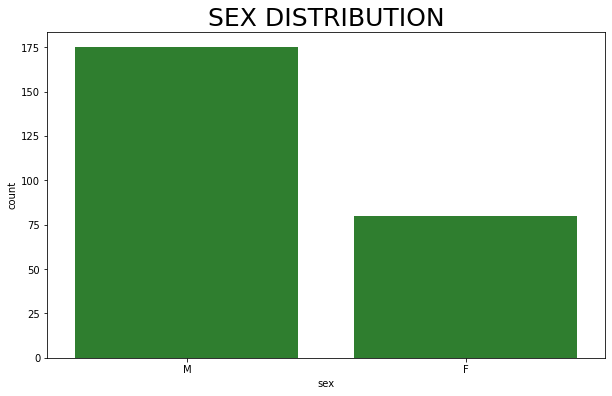

In [12]:
plt.figure(figsize=(10,6))
plt.title('SEX DISTRIBUTION', fontsize=25)
sns.barplot(x='sex', y='count', palette=["forestgreen"],data=df3);

# 

# DISTRIBUTION OF MANDIBULAR FRACTURE ACCORDING TO AGE AND GENDER

In [13]:
df1=df.groupby('AGE')['SEX'].value_counts()
df1=pd.DataFrame(df1)
df1=df1.drop(['SEX'], axis=1)


In [14]:

df1=df1.reset_index()


In [15]:
bins = [7, 18, 30, 40, 50, 60, 70]
labels = ['7-17','18-29', '30-39', '40-49', '50-59', '60-69']
df1['agerange'] = pd.cut(df1.AGE, bins, labels = labels,include_lowest = True)


In [16]:
df2=pd.DataFrame(df1.groupby('SEX')['agerange'].value_counts())
df2=df2.reset_index()
df2.head(1)

,SEX,level_1,agerange
0,F,18-29,11


In [17]:
df2=df2.rename({'level_1':'Agerange'}, axis=1)


In [18]:
df2=df2.rename({'agerange':'freq'}, axis=1)
df2.head(2)

,SEX,Agerange,freq
0,F,18-29,11
1,F,30-39,6


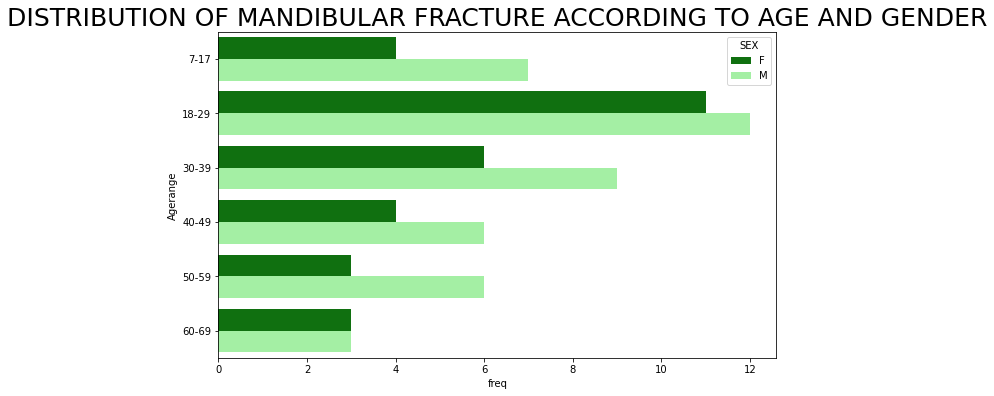

In [19]:
plt.figure(figsize=(10,6))
plt.title('DISTRIBUTION OF MANDIBULAR FRACTURE ACCORDING TO AGE AND GENDER', fontsize=25)
sns.barplot(x='freq', y='Agerange', hue='SEX', palette=["green", "palegreen"],data=df2);


### Mandibular fracture was highest in the age group of 18-29 years old in both males and females  

# 

# DISTRIBUTION OF MANDIBULAR FRACTURE ACCORDING TO ETIOLOGY

In [20]:
df4=df.groupby('SEX')['CAUSE'].value_counts()

In [21]:
df4=pd.DataFrame(df4)

In [22]:
df4=df4.rename({'CAUSE':'COUNT'}, axis=1)
df4.head(1)

,,COUNT
SEX,CAUSE,
F,RTA,65


In [23]:
df4=df4.reset_index()

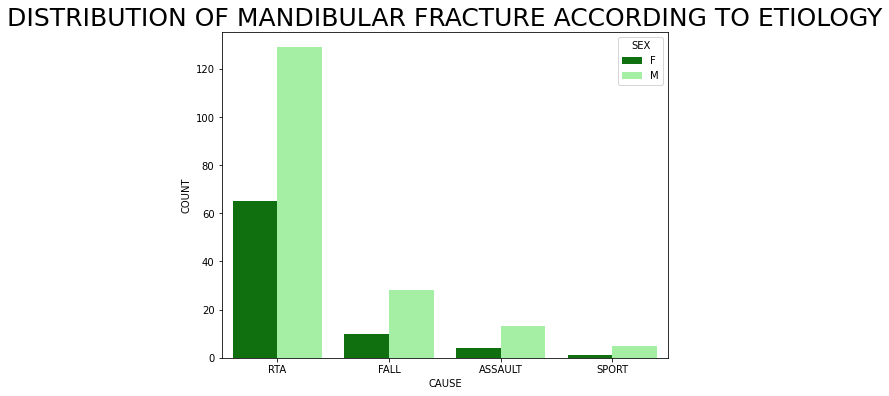

In [24]:
plt.figure(figsize=(8,6))
plt.title('DISTRIBUTION OF MANDIBULAR FRACTURE ACCORDING TO ETIOLOGY', fontsize=25)
sns.barplot(x='CAUSE', y='COUNT', hue='SEX', palette=["green", "palegreen"], data=df4);


### Road Traffick Accident is the highest cause of mandibular fracture in both male and female subjects

# 
# 


# DISTRIBUTION OF MANDIBULAR FRACTURE ACCORDING TO ANATOMICAL SITE

In [25]:
df5=pd.DataFrame(df.groupby('SEX')['SITE'].value_counts())


In [26]:
df5=df5.rename({'SITE':'COUNT'}, axis=1)


In [27]:
df5=df5.reset_index()
df5.head(1)

,SEX,SITE,COUNT
0,F,B,30


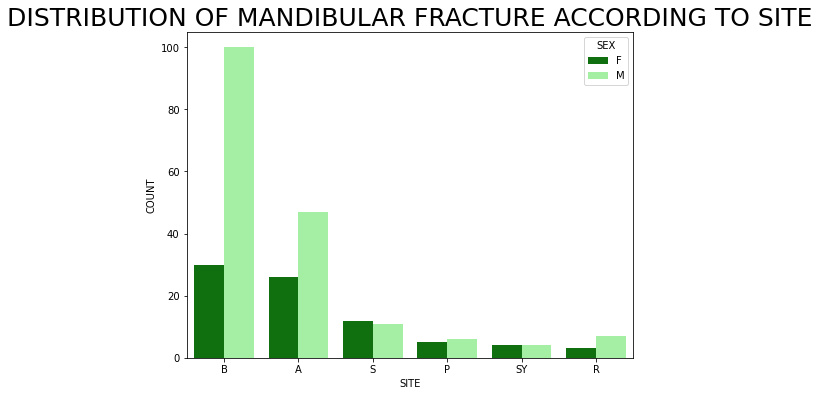

In [28]:
plt.figure(figsize=(8,6))
plt.title('DISTRIBUTION OF MANDIBULAR FRACTURE ACCORDING TO SITE', fontsize=25)
sns.barplot(x='SITE', y='COUNT', hue='SEX', palette=["green", "palegreen"], data=df5);


### The sight with the highest occurence of mandibular fracture is the body of the mandible in both male and female subjects

# 
# 


# THE OCCURRENCE OF MANDIBULAR FRACTURES IN DIFFERENT OCCUPATIONS

In [29]:
df6=pd.DataFrame(df.groupby('SEX')['OCCUPATION'].value_counts())


In [30]:
df6=df6.rename({'OCCUPATION':'COUNT'}, axis=1)


In [31]:
df6=df6.reset_index()
df6.head(2) 

,SEX,OCCUPATION,COUNT
0,F,BUS,33
1,F,STUDENT,23


In [32]:
df6=df6.drop([7, 21], axis=0)

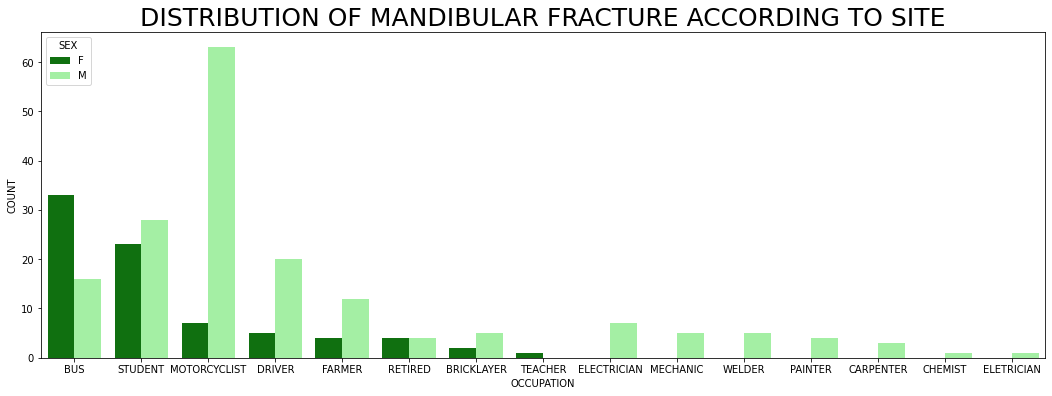

In [33]:
plt.figure(figsize=(18,6))
plt.title('DISTRIBUTION OF MANDIBULAR FRACTURE ACCORDING TO SITE', fontsize=25)
sns.barplot(x='OCCUPATION', y='COUNT', hue='SEX', palette=["green", "palegreen"], data=df6);


## The occupation with the highest rate of mandibular fracture for males is motorcycling while for females, business owners have the highest occurence

# 
# 


# TRENDS OF MANSDINBULAR FRACTURE OVER A TEN YEAR PERIOD

In [34]:
df.head(1)

,DATE,AGE,OCCUPATION,CAUSE,SITE,SEX
0,05/2014,7,STUDENT,SPORT,P,F


In [35]:
df['date']=pd.to_datetime(df.DATE)


In [36]:
df['year']=pd.DatetimeIndex(df.DATE).year


In [37]:
df['quarter'] = df['date'].dt.to_period('Q')
df.head(1)

,DATE,AGE,OCCUPATION,CAUSE,SITE,SEX,date,year,quarter
0,05/2014,7,STUDENT,SPORT,P,F,2014-05-01,2014,2014Q2


In [38]:
df10=df['quarter'].value_counts()
df11=pd.DataFrame(df10)
df11.head(1)

,quarter
2020Q4,12


In [39]:
df10=df11.rename({'quarter':'COUNT'}, axis=1)
df10=df10.reset_index()

In [40]:
df10=df10.rename({'index':'quarter'}, axis=1)
df10.head(10)

,quarter,COUNT
0,2020Q4,12
1,2019Q4,12
2,2017Q4,11
3,2016Q4,10
4,2020Q1,9
5,2018Q4,9
6,2015Q4,9
7,2017Q1,8
8,2019Q1,8
9,2020Q2,8


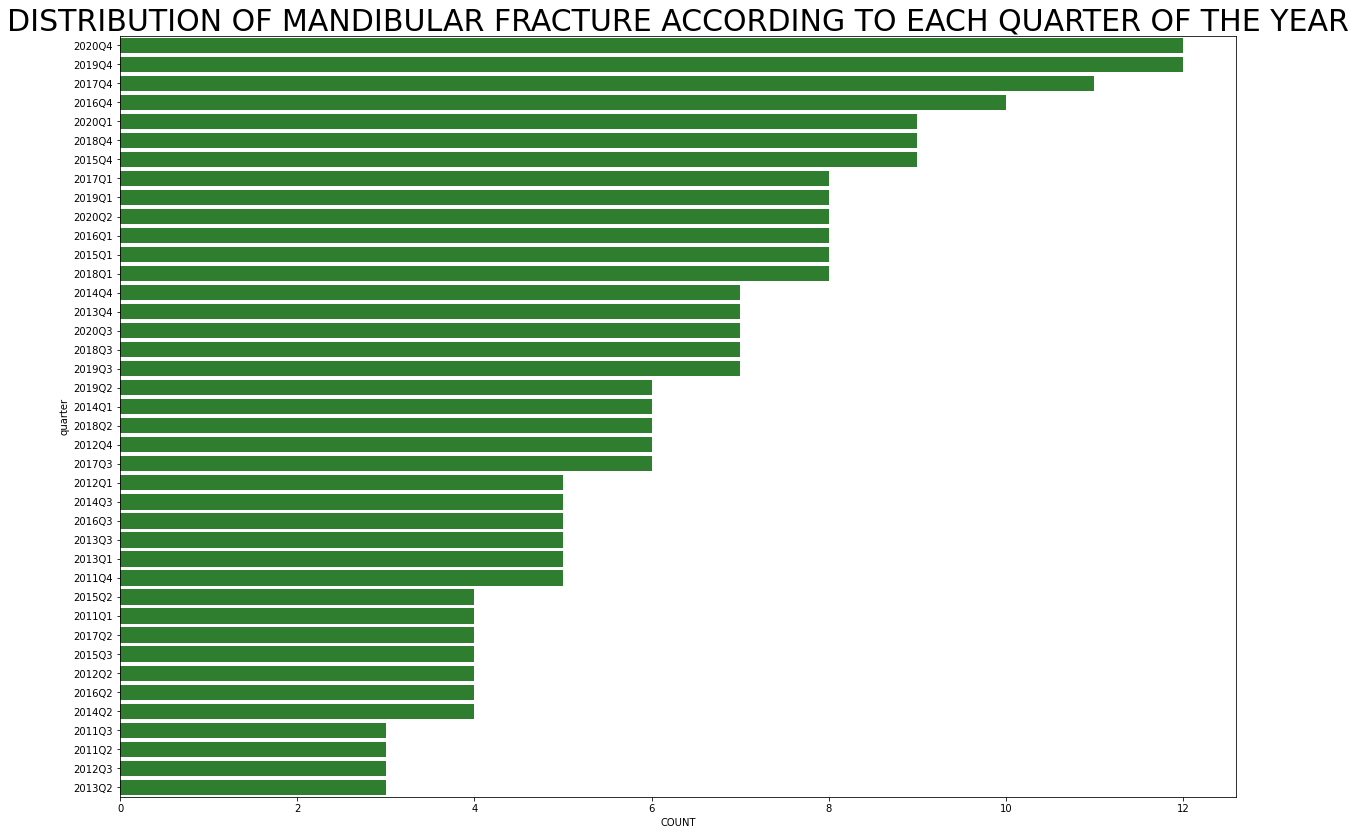

In [46]:
plt.figure(figsize=(20,14))
plt.title('DISTRIBUTION OF MANDIBULAR FRACTURE ACCORDING TO EACH QUARTER OF THE YEAR', fontsize=30)
sns.barplot(x='COUNT', y='quarter', palette=["forestgreen"], data=df10);


## The last quarter of each year has the higest record of mandibuler fracture occurrence 

# 
# 


# NUMBER OF MANDIBULAR FRACTURES IN EACH 5 YEAR PERIOD

In [89]:
df8= df['year']
df8=pd.DataFrame(df8)



In [90]:
bins = [2011,2015,2021]
labels = ['2011-2015', '2016-2020']
df8['5 year range'] = pd.cut(df8.year, bins, labels = labels,include_lowest = True)

In [91]:
df9=pd.DataFrame(df8['5 year range'].value_counts())
df9

,5 year range
2016-2020,155
2011-2015,100


In [92]:
df9=df9.reset_index()

In [93]:
df9=df9.rename({'5 year range':'COUNT'}, axis=1)

In [94]:
df9=df9.rename({'index':'5 year range'}, axis=1)
df9

,5 year range,COUNT
0,2016-2020,155
1,2011-2015,100


''

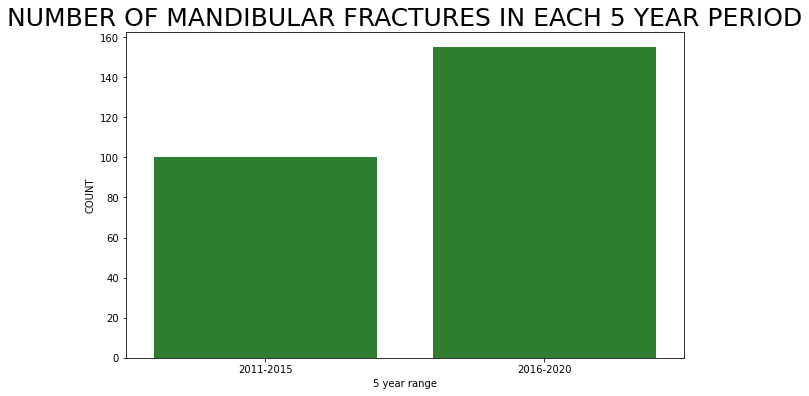

In [410]:
plt.figure(figsize=(10,6))
plt.title('NUMBER OF MANDIBULAR FRACTURES IN EACH 5 YEAR PERIOD', fontsize=25)
sns.barplot(x='5 year range', y='COUNT', palette=["forestgreen"],data=df9)
;

## There have been a noticable increase in the occurence of mandibular fracture in the last five years

# 
# 

# The correlation between cause and occupation of the patient

In [47]:
df.head(2)

,DATE,AGE,OCCUPATION,CAUSE,SITE,SEX,date,year,quarter
0,05/2014,7,STUDENT,SPORT,P,F,2014-05-01,2014,2014Q2
1,10/2011,9,STUDENT,RTA,B,M,2011-10-01,2011,2011Q4


In [74]:
# Cross tabulation between cause and occupation
Crosstab=pd.crosstab(index=df['CAUSE'],columns=df['OCCUPATION'])
print(Crosstab)

OCCUPATION  BRICKLAYER  BUS  BUSINESS  CARPENTER  CHEMIST  DRIVER  \
CAUSE                                                               
ASSAULT              0    2         0          0        0       0   
FALL                 7    1         0          3        0       0   
RTA                  0   46         2          0        1      25   
SPORT                0    0         0          0        0       0   

OCCUPATION  ELECTRICIAN  ELETRICIAN  FARMER  MECHANIC  MOTORCYCLIST  PAINTER  \
CAUSE                                                                          
ASSAULT               3           0       0         0             1        1   
FALL                  3           1      11         0             1        2   
RTA                   1           0       5         5            68        1   
SPORT                 0           0       0         0             0        0   

OCCUPATION  RETIRED  STUDENT  TEACHER  WELDER  
CAUSE                                          
ASSAULT 

In [51]:
# importing the required function from python library 
from scipy.stats import chi2_contingency

In [63]:
chisq = chi2_contingency(Crosstab)

# If P-Value >0.05 then only we Accept the assumption(H0)
print('The P-Value of the ChiSq Test is:', chisq[1])

The P-Value of the ChiSq Test is: 4.0301420829687497e-28


In [56]:
chisq[0:3]

(238.26015408876518, 4.0301420829687497e-28, 45)


#### From above, 4.03e-28 is the p-value,238.26 is the statistical value and 45 is the degree of freedom. 
#### As the p-value is less than 0.05, we reject the NULL hypothesis and assume that the variables ‘occupation’ and ‘cause’ are dependent of each other.



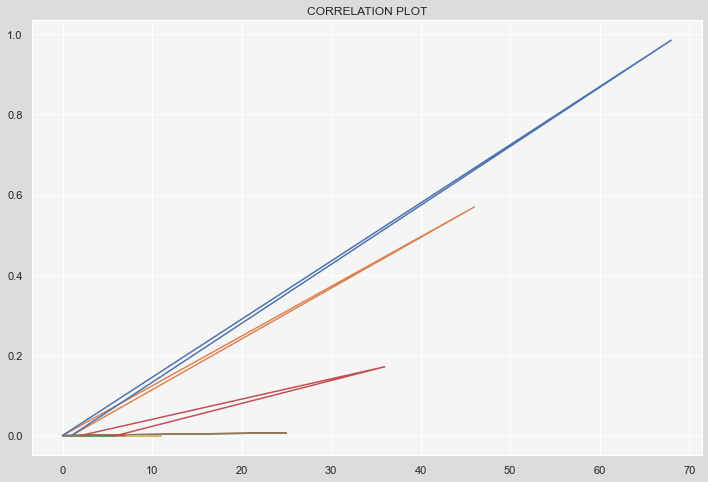

In [96]:
from scipy.stats import chi2
plt.figure(figsize=(12,8))
plt.title('CORRELATION PLOT')
plt.plot(Crosstab, chi2.cdf(Crosstab, df=45))


plt.show()

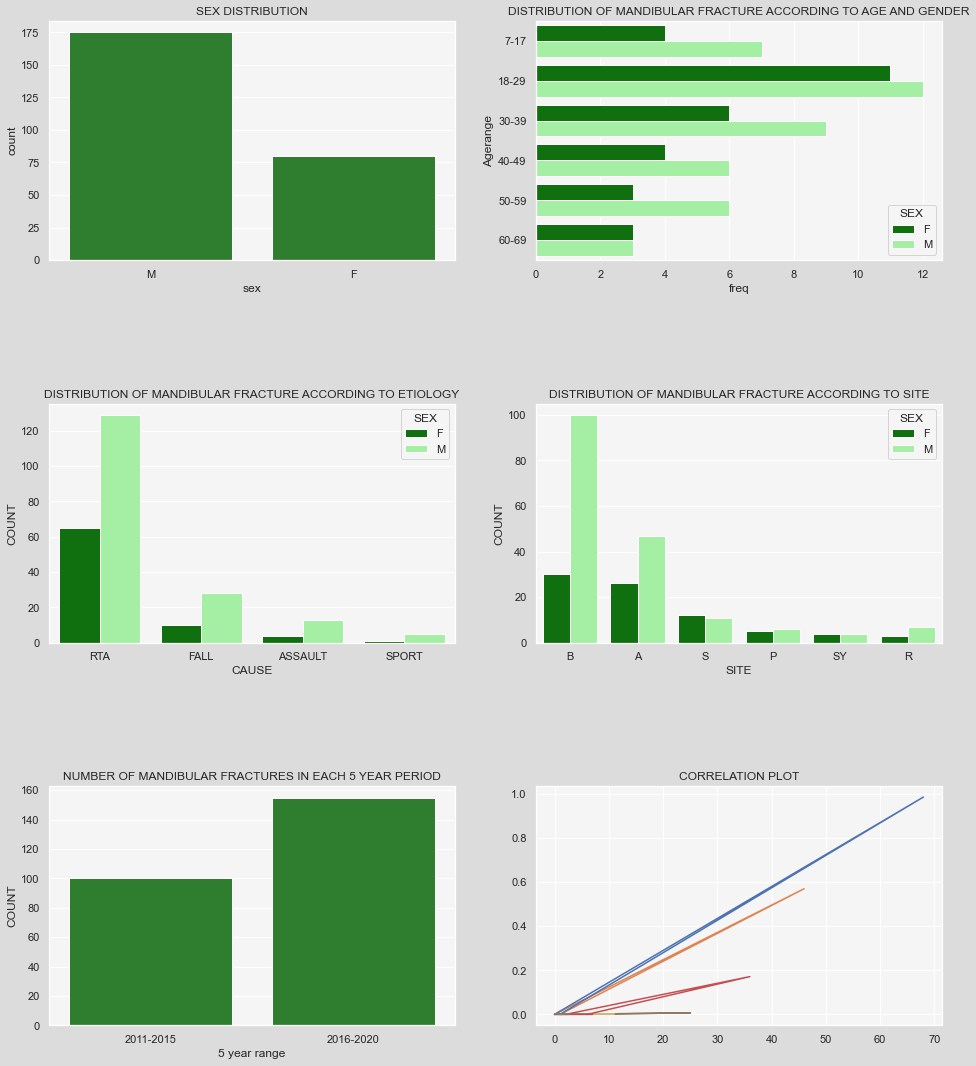

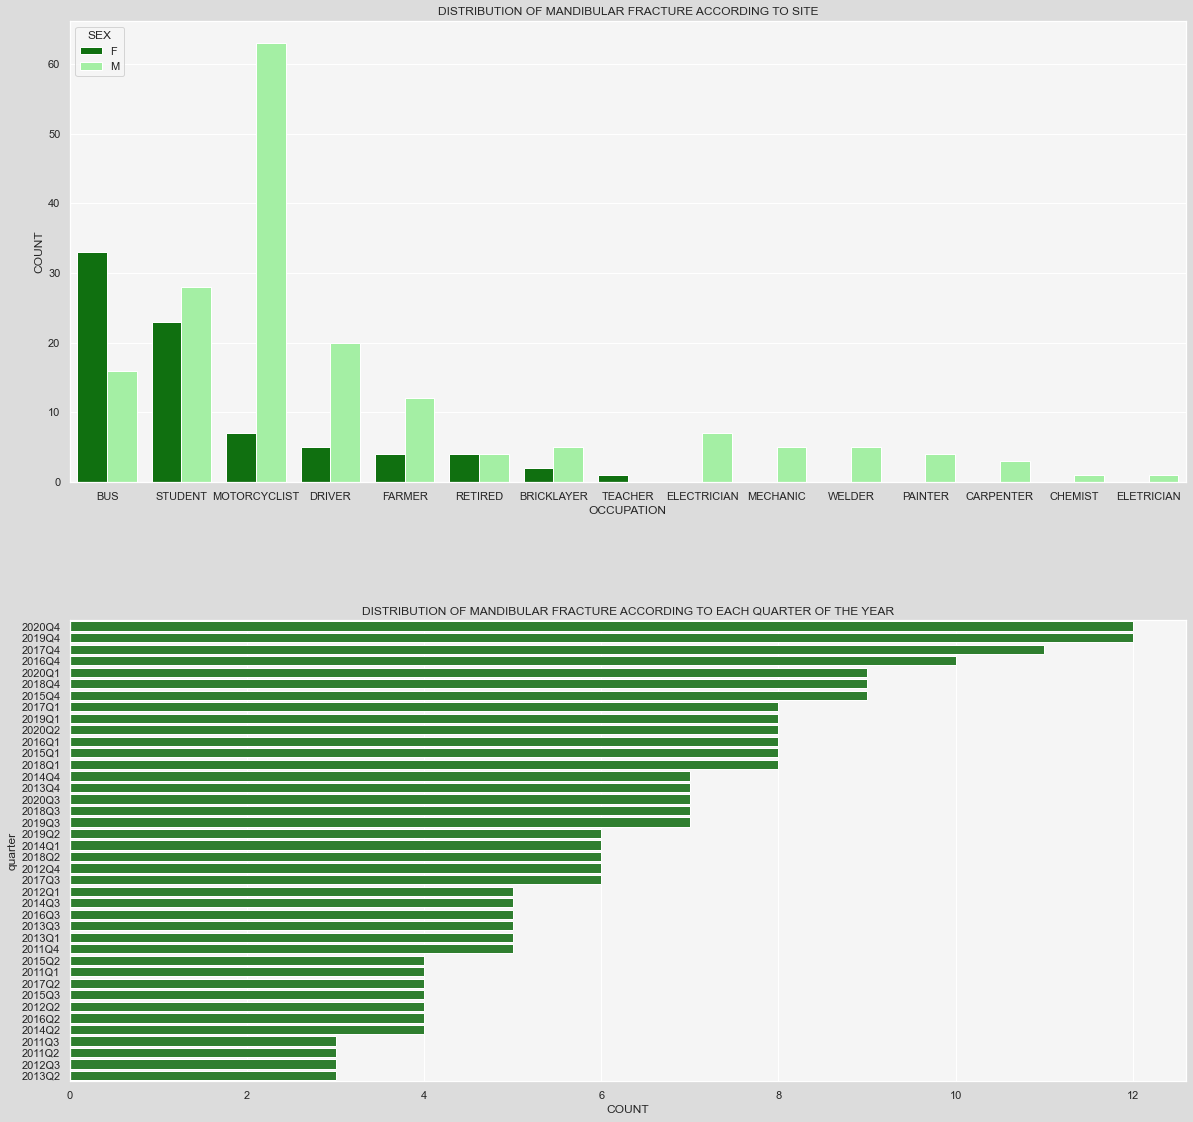

In [111]:
fig, axes = plt.subplots(3, 2, figsize=(16, 18),)
sns.set(rc={'axes.facecolor':'whitesmoke', 'figure.facecolor':'gainsboro'})
grid=True
plt.subplots_adjust(wspace=0.2,
                    top=0.9, 
                    hspace=0.6)

axes[0,0].set_title('SEX DISTRIBUTION')
sns.barplot(x='sex', y='count', palette=["forestgreen"],ax=axes[0,0], data=df3);


axes[0,1].set_title('DISTRIBUTION OF MANDIBULAR FRACTURE ACCORDING TO AGE AND GENDER')
sns.barplot(x='freq', y='Agerange', hue='SEX', palette=["green", "palegreen"],data=df2, ax=axes[0,1]);


axes[1,0].set_title('DISTRIBUTION OF MANDIBULAR FRACTURE ACCORDING TO ETIOLOGY')
sns.barplot(x='CAUSE', y='COUNT', hue='SEX', palette=["green", "palegreen"], data=df4, ax=axes[1,0]);


axes[1,1].set_title('DISTRIBUTION OF MANDIBULAR FRACTURE ACCORDING TO SITE')
sns.barplot(x='SITE', y='COUNT', hue='SEX', palette=["green", "palegreen"], data=df5, ax=axes[1,1] );



axes[2,0].set_title('NUMBER OF MANDIBULAR FRACTURES IN EACH 5 YEAR PERIOD')
sns.barplot(x='5 year range', y='COUNT', palette=["forestgreen"],data=df9, ax=axes[2,0]);


axes[2,1].set_title('CORRELATION PLOT')
axes[2,1].plot(Crosstab, chi2.cdf(Crosstab, df=45));

fig, axes = plt.subplots(2, 1, figsize=(20, 19),)
sns.set(rc={'axes.facecolor':'whitesmoke', 'figure.facecolor':'gainsboro'})
grid=True
plt.subplots_adjust(wspace=0.2,
       

             top=0.9, 
                    hspace=0.3)

axes[0].set_title('DISTRIBUTION OF MANDIBULAR FRACTURE ACCORDING TO SITE')
sns.barplot(x='OCCUPATION', y='COUNT', hue='SEX', palette=["green", "palegreen"], data=df6, ax=axes[0]);

axes[1].set_title('DISTRIBUTION OF MANDIBULAR FRACTURE ACCORDING TO EACH QUARTER OF THE YEAR')
sns.barplot(x='COUNT', y='quarter', palette=["forestgreen"], data=df10, ax=axes[1]);